In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df=pd.read_csv(f'../../datasets/CVD_cleaned.csv')

In [3]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [5]:
df.drop_duplicates()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


In [6]:
df.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [7]:
for i in df.columns:
  dis = len(df[i].unique())
  print(f"{i} - {dis}")

General_Health - 5
Checkup - 5
Exercise - 2
Heart_Disease - 2
Skin_Cancer - 2
Other_Cancer - 2
Depression - 2
Diabetes - 4
Arthritis - 2
Sex - 2
Age_Category - 13
Height_(cm) - 99
Weight_(kg) - 525
BMI - 3654
Smoking_History - 2
Alcohol_Consumption - 31
Fruit_Consumption - 77
Green_Vegetables_Consumption - 75
FriedPotato_Consumption - 69


In [8]:
df['Checkup'].value_counts()

Checkup
Within the past year       239371
Within the past 2 years     37213
Within the past 5 years     17442
5 or more years ago         13421
Never                        1407
Name: count, dtype: int64

In [9]:
df['Diabetes'].value_counts()

Diabetes
No                                            259141
Yes                                            40171
No, pre-diabetes or borderline diabetes         6896
Yes, but female told only during pregnancy      2646
Name: count, dtype: int64

In [10]:

from sklearn.preprocessing import OrdinalEncoder

In [11]:
enc = OrdinalEncoder()
df['Exercise'] = enc.fit_transform(df[['Exercise']])
df['Heart_Disease'] = enc.fit_transform(df[['Heart_Disease']])
df['Skin_Cancer'] = enc.fit_transform(df[['Skin_Cancer']])
df['Other_Cancer'] = enc.fit_transform(df[['Other_Cancer']])
df['Depression'] = enc.fit_transform(df[['Depression']])
df['Sex'] = enc.fit_transform(df[['Sex']])
df['Arthritis'] = enc.fit_transform(df[['Arthritis']])
df['Smoking_History'] = enc.fit_transform(df[['Smoking_History']])
df.head(10)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,0.0,0.0,0.0,0.0,0.0,No,1.0,0.0,70-74,150.0,32.66,14.54,1.0,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,0.0,1.0,0.0,0.0,0.0,Yes,0.0,0.0,70-74,165.0,77.11,28.29,0.0,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,1.0,0.0,0.0,0.0,0.0,Yes,0.0,0.0,60-64,163.0,88.45,33.47,0.0,4.0,12.0,3.0,16.0
3,Poor,Within the past year,1.0,1.0,0.0,0.0,0.0,Yes,0.0,1.0,75-79,180.0,93.44,28.73,0.0,0.0,30.0,30.0,8.0
4,Good,Within the past year,0.0,0.0,0.0,0.0,0.0,No,0.0,1.0,80+,191.0,88.45,24.37,1.0,0.0,8.0,4.0,0.0
5,Good,Within the past year,0.0,0.0,0.0,0.0,1.0,No,1.0,1.0,60-64,183.0,154.22,46.11,0.0,0.0,12.0,12.0,12.0
6,Fair,Within the past year,1.0,1.0,0.0,0.0,0.0,No,1.0,1.0,60-64,175.0,69.85,22.74,1.0,0.0,16.0,8.0,0.0
7,Good,Within the past year,1.0,0.0,0.0,0.0,0.0,No,1.0,0.0,65-69,165.0,108.86,39.94,1.0,3.0,30.0,8.0,8.0
8,Fair,Within the past year,0.0,0.0,0.0,0.0,1.0,No,0.0,0.0,65-69,163.0,72.57,27.46,1.0,0.0,12.0,12.0,4.0
9,Fair,Within the past year,0.0,0.0,0.0,0.0,0.0,Yes,1.0,0.0,70-74,163.0,91.63,34.67,0.0,0.0,12.0,12.0,1.0


## Vanilla Curriculum Learning is mostly used when a data set has clearly defined labels of difficulty
beforehand. This strategy only has an influence on the data level of the model, structuring it in an
ascending manner, based on this label of difficulty. An example of this is Bengio et al. [7], where
6
they used this approach in their geometric shapes qualifier to split the data into two sets, one
containing easier and clearer images of ’perfect’ shapes, and the other containing more convoluted
shapes and sizes. And using the easy dataset to gain an advantage on the accuracy of the model
when tested on the second set.

In [12]:
rank=['Poor','Fair','Good','Very Good','Excellent']
oe = OrdinalEncoder(categories=[rank])
df['General_Health']=oe.fit_transform(df[['General_Health']])
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0.0,Within the past 2 years,0.0,0.0,0.0,0.0,0.0,No,1.0,0.0,70-74,150.0,32.66,14.54,1.0,0.0,30.0,16.0,12.0
1,3.0,Within the past year,0.0,1.0,0.0,0.0,0.0,Yes,0.0,0.0,70-74,165.0,77.11,28.29,0.0,0.0,30.0,0.0,4.0
2,3.0,Within the past year,1.0,0.0,0.0,0.0,0.0,Yes,0.0,0.0,60-64,163.0,88.45,33.47,0.0,4.0,12.0,3.0,16.0
3,0.0,Within the past year,1.0,1.0,0.0,0.0,0.0,Yes,0.0,1.0,75-79,180.0,93.44,28.73,0.0,0.0,30.0,30.0,8.0
4,2.0,Within the past year,0.0,0.0,0.0,0.0,0.0,No,0.0,1.0,80+,191.0,88.45,24.37,1.0,0.0,8.0,4.0,0.0


In [13]:
df.head(10)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0.0,Within the past 2 years,0.0,0.0,0.0,0.0,0.0,No,1.0,0.0,70-74,150.0,32.66,14.54,1.0,0.0,30.0,16.0,12.0
1,3.0,Within the past year,0.0,1.0,0.0,0.0,0.0,Yes,0.0,0.0,70-74,165.0,77.11,28.29,0.0,0.0,30.0,0.0,4.0
2,3.0,Within the past year,1.0,0.0,0.0,0.0,0.0,Yes,0.0,0.0,60-64,163.0,88.45,33.47,0.0,4.0,12.0,3.0,16.0
3,0.0,Within the past year,1.0,1.0,0.0,0.0,0.0,Yes,0.0,1.0,75-79,180.0,93.44,28.73,0.0,0.0,30.0,30.0,8.0
4,2.0,Within the past year,0.0,0.0,0.0,0.0,0.0,No,0.0,1.0,80+,191.0,88.45,24.37,1.0,0.0,8.0,4.0,0.0
5,2.0,Within the past year,0.0,0.0,0.0,0.0,1.0,No,1.0,1.0,60-64,183.0,154.22,46.11,0.0,0.0,12.0,12.0,12.0
6,1.0,Within the past year,1.0,1.0,0.0,0.0,0.0,No,1.0,1.0,60-64,175.0,69.85,22.74,1.0,0.0,16.0,8.0,0.0
7,2.0,Within the past year,1.0,0.0,0.0,0.0,0.0,No,1.0,0.0,65-69,165.0,108.86,39.94,1.0,3.0,30.0,8.0,8.0
8,1.0,Within the past year,0.0,0.0,0.0,0.0,1.0,No,0.0,0.0,65-69,163.0,72.57,27.46,1.0,0.0,12.0,12.0,4.0
9,1.0,Within the past year,0.0,0.0,0.0,0.0,0.0,Yes,1.0,0.0,70-74,163.0,91.63,34.67,0.0,0.0,12.0,12.0,1.0


In [14]:
rank1=['No','No, pre-diabetes or borderline diabetes','Yes, but female told only during pregnancy','Yes']
oe1 = OrdinalEncoder(categories=[rank1])
df['Diabetes']=oe1.fit_transform(df[['Diabetes']])
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0.0,Within the past 2 years,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,70-74,150.0,32.66,14.54,1.0,0.0,30.0,16.0,12.0
1,3.0,Within the past year,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,70-74,165.0,77.11,28.29,0.0,0.0,30.0,0.0,4.0
2,3.0,Within the past year,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,60-64,163.0,88.45,33.47,0.0,4.0,12.0,3.0,16.0
3,0.0,Within the past year,1.0,1.0,0.0,0.0,0.0,3.0,0.0,1.0,75-79,180.0,93.44,28.73,0.0,0.0,30.0,30.0,8.0
4,2.0,Within the past year,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,80+,191.0,88.45,24.37,1.0,0.0,8.0,4.0,0.0


In [15]:
rank2=['Within the past year','Within the past 2 years','Within the past 5 years','5 or more years ago','Never']
oe2 = OrdinalEncoder(categories=[rank2])
df['Checkup']=oe2.fit_transform(df[['Checkup']])
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,70-74,150.0,32.66,14.54,1.0,0.0,30.0,16.0,12.0
1,3.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,70-74,165.0,77.11,28.29,0.0,0.0,30.0,0.0,4.0
2,3.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,60-64,163.0,88.45,33.47,0.0,4.0,12.0,3.0,16.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,1.0,75-79,180.0,93.44,28.73,0.0,0.0,30.0,30.0,8.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,80+,191.0,88.45,24.37,1.0,0.0,8.0,4.0,0.0


In [16]:
df['Age_Category']=df['Age_Category'].str[:2].astype(int)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  float64
 1   Checkup                       308854 non-null  float64
 2   Exercise                      308854 non-null  float64
 3   Heart_Disease                 308854 non-null  float64
 4   Skin_Cancer                   308854 non-null  float64
 5   Other_Cancer                  308854 non-null  float64
 6   Depression                    308854 non-null  float64
 7   Diabetes                      308854 non-null  float64
 8   Arthritis                     308854 non-null  float64
 9   Sex                           308854 non-null  float64
 10  Age_Category                  308854 non-null  int32  
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [18]:
# Relevant features [df_easy_BMI, df_easy_age, df_easy_height, df_easy_weight, df_easy_fried, df_easy_green, df_easy_general, df_easy_fruit, df_easy_checkup, df_easy_diabetes, df_easy_alcohol]
df[['BMI', 'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'FriedPotato_Consumption', 'Green_Vegetables_Consumption', 'General_Health', 'Fruit_Consumption', 'Checkup', 'Diabetes', 'Alcohol_Consumption']].mean()

BMI                              28.626211
Age_Category                     52.558468
Height_(cm)                     170.615249
Weight_(kg)                      83.588655
FriedPotato_Consumption           6.296616
Green_Vegetables_Consumption     15.110441
General_Health                    2.530448
Fruit_Consumption                29.835200
Checkup                           0.382019
Diabetes                          0.429656
Alcohol_Consumption               5.096366
dtype: float64

In [19]:
def split_dataframe_distribution(df):
    columns = ['BMI', 'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'FriedPotato_Consumption', 'Green_Vegetables_Consumption', 'General_Health', 'Fruit_Consumption', 'Checkup', 'Diabetes', 'Alcohol_Consumption']

    df['Sum_Columns'] = df[columns].sum(axis=1)  # Add a new column that sums up the values in each row

    mean = df['Sum_Columns'].mean()  # Calculate the mean of the Sum_Columns
    std = df['Sum_Columns'].std()  # Calculate the standard deviation of the Sum_Columns


    df_easy = df[(df['Sum_Columns'] > mean - std) & (df['Sum_Columns'] < mean + std)]

    df_medium = df[((df['Sum_Columns'] >= mean - 2 * std) & (df['Sum_Columns'] <= mean - std)) |
                   ((df['Sum_Columns'] <= mean + 2 * std) & (df['Sum_Columns'] >= mean + std))]

    df_hard = df[(df['Sum_Columns'] < mean - 2 * std) | (df['Sum_Columns'] > mean + 2 * std)]



    df_easy['Level'] = 'Easy'
    df_medium['Level'] = 'Medium'
    df_hard['Level'] = 'Hard'

    return df_easy, df_medium, df_hard

df_easy, df_medium, df_hard = split_dataframe_distribution(df)




C:\Users\sasop\AppData\Local\Temp\ipykernel_18788\764743000.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_easy['Level'] = 'Easy'
C:\Users\sasop\AppData\Local\Temp\ipykernel_18788\764743000.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_medium['Level'] = 'Medium'
C:\Users\sasop\AppData\Local\Temp\ipykernel_18788\764743000.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [20]:
df_easy.groupby('Level').min()[['Sum_Columns']]

,Sum_Columns
Level,
Easy,346.88


In [21]:
df_medium.groupby('Level').min()[['Sum_Columns']]

,Sum_Columns
Level,
Medium,298.68


In [22]:
df_hard.groupby('Level').min()[['Sum_Columns']]

,Sum_Columns
Level,
Hard,218.91


In [41]:
df_curriculum = pd.concat([df_easy, df_medium ,df_hard], axis=0, join="inner")


# Shuffle the dataframe
df_curriculum = df_curriculum.sample(frac=1).reset_index(drop=True)

subset_cols = list(df_curriculum.columns)  # List of all columns
column_to_ignore = 'Level'  # Replace 'column_name' with the column you want to ignore
subset_cols.remove(column_to_ignore)

# Remove duplicates while ignoring a specific column
df_curriculum = df_curriculum.drop_duplicates(keep='last' ,subset=subset_cols)
round(df_curriculum['Level'].value_counts(normalize=True) * 100, 2)

Level
Easy      69.66
Medium    25.76
Hard       4.58
Name: proportion, dtype: float64

In [39]:
df_curriculum['Level'].value_counts()

Level
Easy      215101
Medium     79536
Hard       14137
Name: count, dtype: int64

<Axes: >

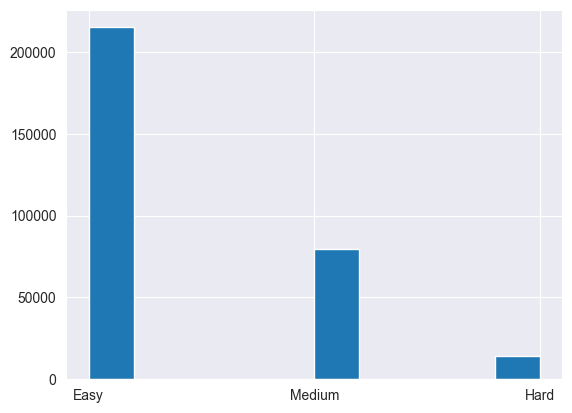

In [24]:
df_curriculum['Level'].hist()

In [25]:
# Calculate mean Height and Weight for each level
df_curriculum.groupby('Level').median()[['Sum_Columns']]

,Sum_Columns
Level,
Easy,392.51
Hard,500.19
Medium,345.17


In [26]:
df_curriculum.shape[0]

308774

In [27]:
df_curriculum['Level'] = pd.Categorical(df_curriculum['Level'], ["Easy", "Medium", "Hard"])
df_curriculum.sort_values("Level", inplace=True)

In [28]:
df_curriculum.to_csv(f"../../datasets/CVD_curriculum.csv")

In [29]:
df_curriculum['Sum_Columns'].describe()  # Calculate the mean of the Sum_Columns

count    308774.000000
mean        395.072767
std          48.199795
min         218.910000
25%         362.170000
50%         392.450000
75%         424.790000
max         740.530000
Name: Sum_Columns, dtype: float64

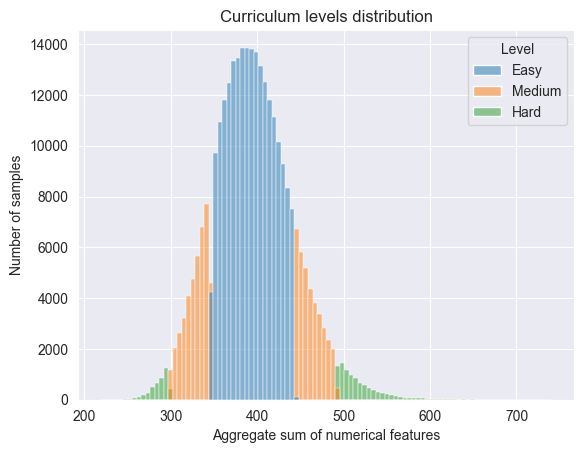

In [30]:

#df_curriculum.rename(columns={'Sum_Columns': 'Aggregate Sum of Numerical Features'}, inplace=True)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
ax = plt.gca()
ax.set_title("Curriculum levels distribution")
ax.set_xlabel("Aggregate sum of numerical features")
ax.set_ylabel("Number of samples")
sns.histplot(x='Sum_Columns', bins=100, hue='Level', data=df_curriculum).figure.savefig("curriculum-levels.pdf")
